In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggele.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  test1.png  test.png


Importing the Dependencies

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3357.jpg', 'with_mask_3277.jpg', 'with_mask_3457.jpg', 'with_mask_2393.jpg', 'with_mask_3503.jpg']
['with_mask_36.jpg', 'with_mask_3134.jpg', 'with_mask_2679.jpg', 'with_mask_672.jpg', 'with_mask_2336.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2792.jpg', 'without_mask_1980.jpg', 'without_mask_2336.jpg', 'without_mask_3181.jpg', 'without_mask_236.jpg']
['without_mask_3005.jpg', 'without_mask_3329.jpg', 'without_mask_1503.jpg', 'without_mask_2360.jpg', 'without_mask_1382.jpg']


In [10]:
print('Number of with mask images', len(with_mask_files))
print('Number of with mask images', len(without_mask_files))

Number of with mask images 3725
Number of with mask images 3828


**Creating labels for the two class of images**

With mask --> 1

Without mask --> 0

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

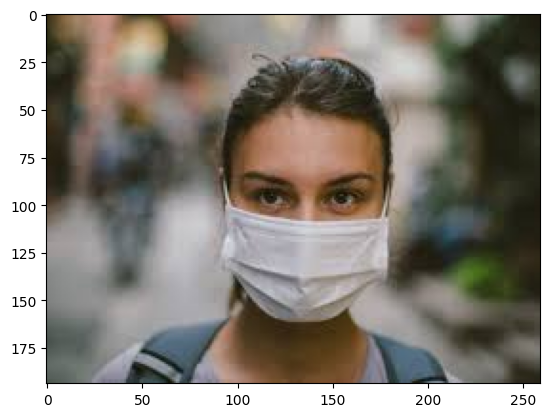

In [15]:
# displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_2679.jpg')
imgplot = plt.imshow(img)
plt.show()

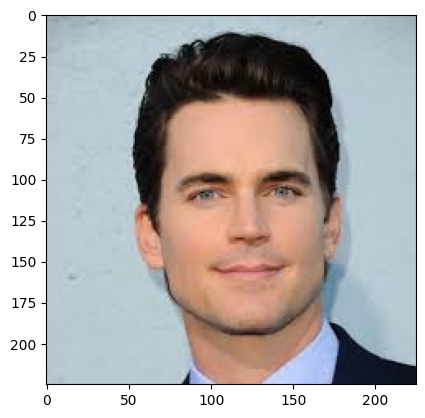

In [16]:
# displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2792.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images
2. Convert the images  to numpy arrays

In [17]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[ 43,  34,  29],
        [ 43,  34,  29],
        [ 44,  35,  29],
        ...,
        [ 27,  36,  33],
        [ 26,  34,  34],
        [ 26,  34,  36]],

       [[ 50,  41,  37],
        [ 50,  41,  37],
        [ 50,  41,  37],
        ...,
        [ 27,  36,  33],
        [ 27,  36,  33],
        [ 27,  35,  34]],

       [[ 60,  52,  51],
        [ 58,  53,  51],
        [ 59,  53,  50],
        ...,
        [ 28,  37,  34],
        [ 26,  35,  32],
        [ 27,  36,  35]],

       ...,

       [[182, 199, 216],
        [184, 200, 217],
        [185, 202, 218],
        ...,
        [ 28,  37,  53],
        [ 68,  66,  68],
        [114, 106,  91]],

       [[179, 196, 215],
        [179, 198, 215],
        [180, 199, 215],
        ...,
        [ 33,  41,  58],
        [ 72,  68,  69],
        [112, 103,  89]],

       [[174, 194, 212],
        [175, 196, 213],
        [176, 197, 214],
        ...,
        [ 33,  40,  57],
        [ 74,  70,  71],
        [113, 103,  90]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [237, 229, 218],
        [237, 229, 218],
        [237, 229, 218]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [237, 229, 218],
        [237, 229, 218],
        [237, 229, 218]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [237, 229, 218],
        [237, 229, 218],
        [237, 229, 218]],

       ...,

       [[ 36,  36,  38],
        [ 32,  32,  34],
        [ 36,  36,  38],
        ...,
        [ 29,  28,  30],
        [ 20,  20,  22],
        [ 31,  31,  33]],

       [[ 36,  35,  39],
        [ 32,  32,  36],
        [ 38,  38,  41],
        ...,
        [ 32,  32,  34],
        [ 19,  19,  21],
        [ 29,  29,  31]],

       [[ 35,  34,  40],
        [ 33,  32,  38],
        [ 41,  40,  46],
        ...,
        [ 36,  37,  39],
        [ 17,  18,  20],
        [ 24,  25,  27]]

In [32]:
X_train_scaled[0]

array([[[0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        ...,
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196]],

       [[0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        ...,
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196]],

       [[0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        ...,
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196]],

       ...,

       [[0.14117647, 0.14117647, 0.14901961],
        [0.1254902 , 0.1254902 , 0.13333333],
        [0.14117647, 0

**Building a Convolusional Neural Network (CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation= 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 27ms/step - loss: 0.4631 - acc: 0.7986 - val_loss: 0.2897 - val_acc: 0.8760
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2860 - acc: 0.8873 - val_loss: 0.2688 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2479 - acc: 0.9033 - val_loss: 0.2295 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2249 - acc: 0.9128 - val_loss: 0.2039 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 4s 21ms/step - loss: 0.1717 - acc: 0.9345 - val_loss: 0.2060 - val_acc: 0.9273


**Model Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('test Accuracy = ', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1721 - acc: 0.9305
test Accuracy =  0.9305095672607422


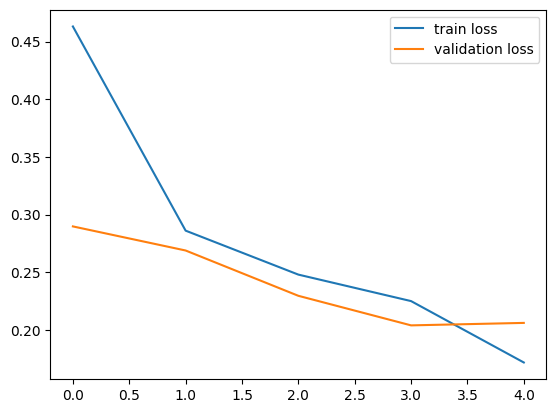

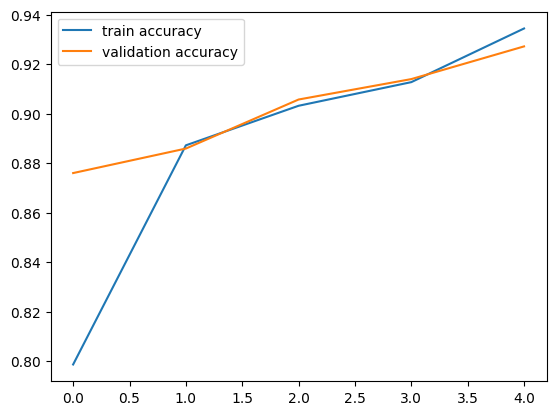

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.png


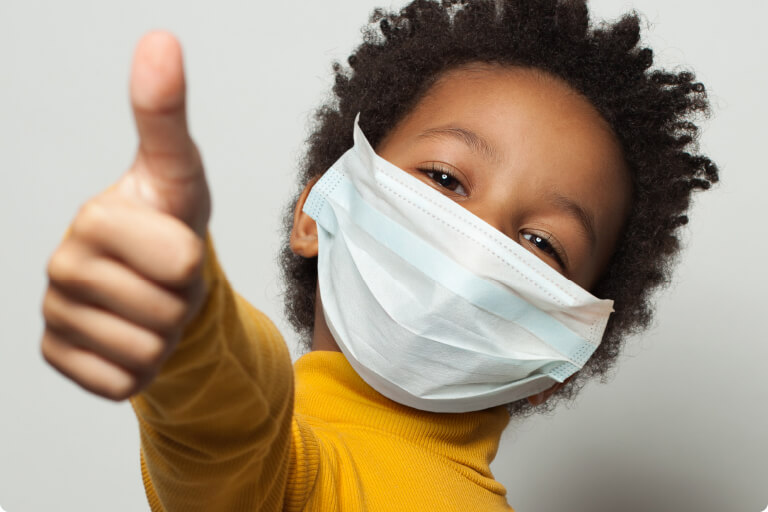

1/1 [==============================] - 0s 29ms/step
[[0.4685926 0.5124527]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')